In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

/home/maksiu106/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/maksiu106/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/maksiu106/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#wytrenowanie modelu na całym zbiorze danych
model.fit(X, y)

LinearRegression()

Współczynnik nachylenia dopasowanej prostej:  269.4620546846952
Wyraz wolny dopasowanej prostej:  -32304.654721028113
MSE zbioru treningowego:  57947526161.288376


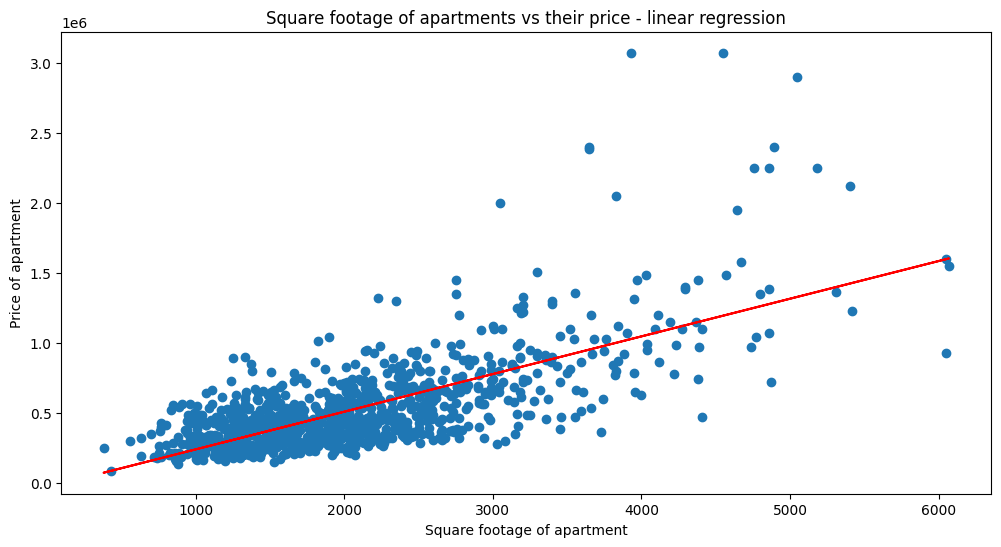

In [3]:
#b)

#wyliczenie spodziewanych cen na podstawie wytrenowanego modelu
y_exp = model.predict(X)

#wyliczenie współczynników dopasowanej prostej
a = model.coef_[0]
b = model.intercept_
mse = mean_squared_error(y, y_exp)
print("Współczynnik nachylenia dopasowanej prostej: ", a)
print("Wyraz wolny dopasowanej prostej: ", b)
print("MSE zbioru treningowego: ", mse)

#rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.scatter(X, y)
plt.plot(X, y_exp, color='red')
plt.xlabel('Square footage of apartment')
plt.ylabel('Price of apartment')
plt.title('Square footage of apartments vs their price - linear regression')
    
plt.show()

Order =  1


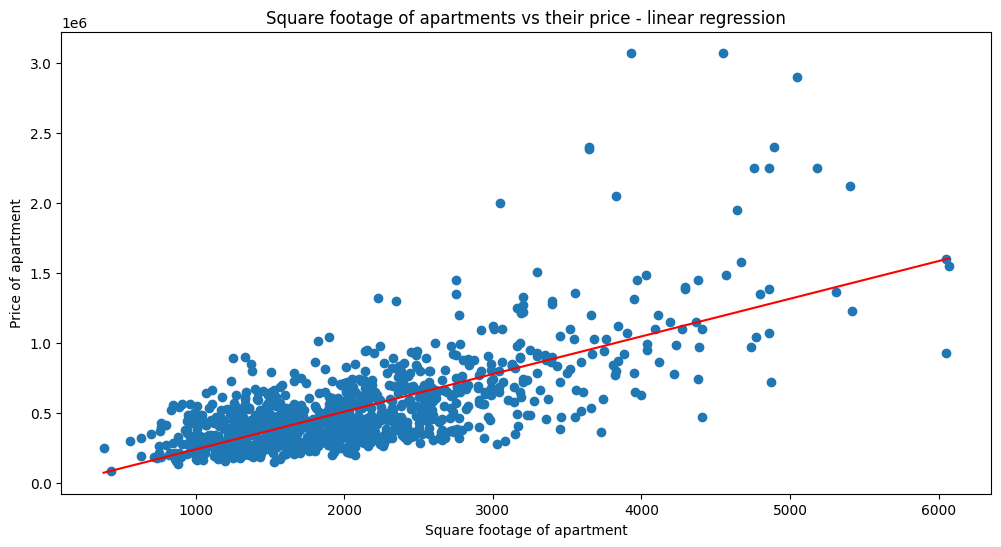

Order =  2


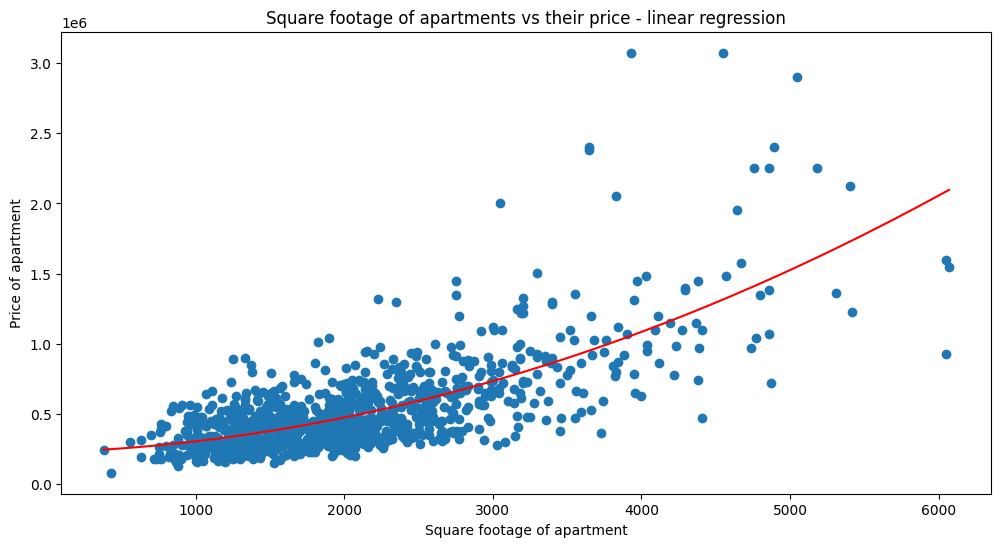

Order =  3


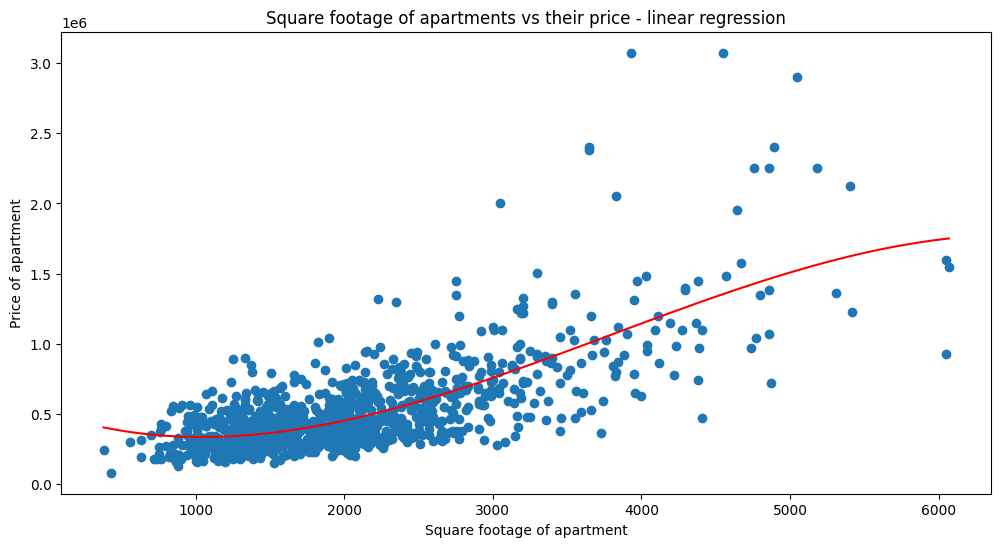

Order =  4


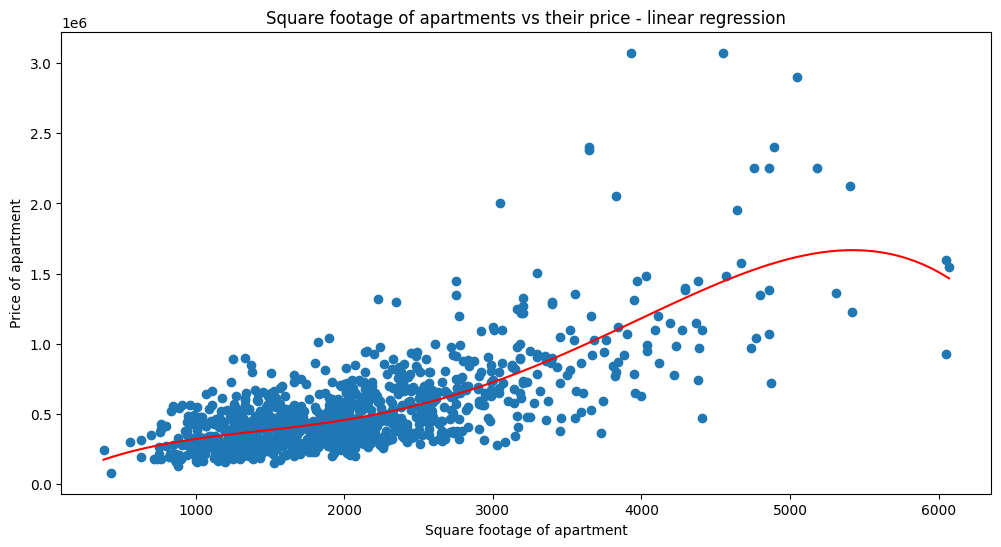

Order =  5


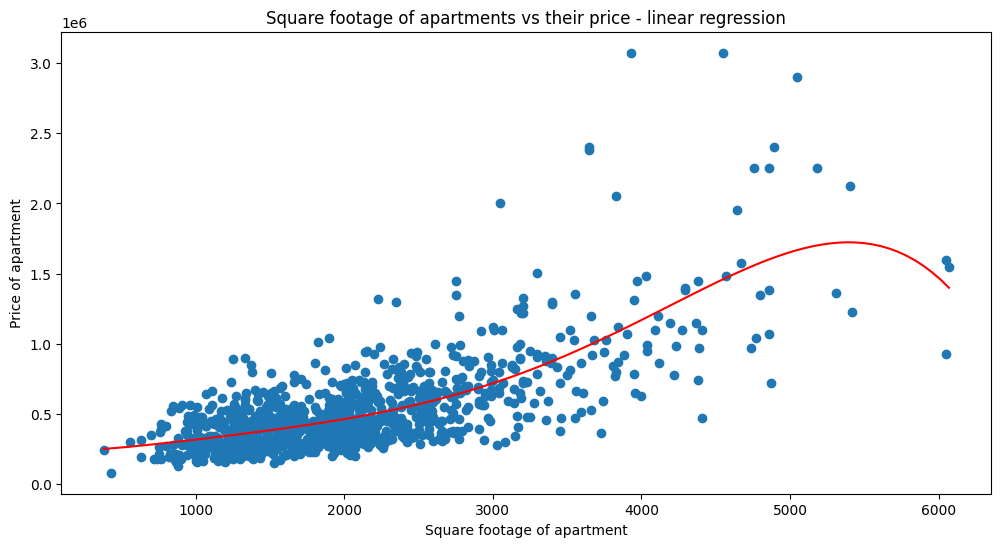

Order =  6


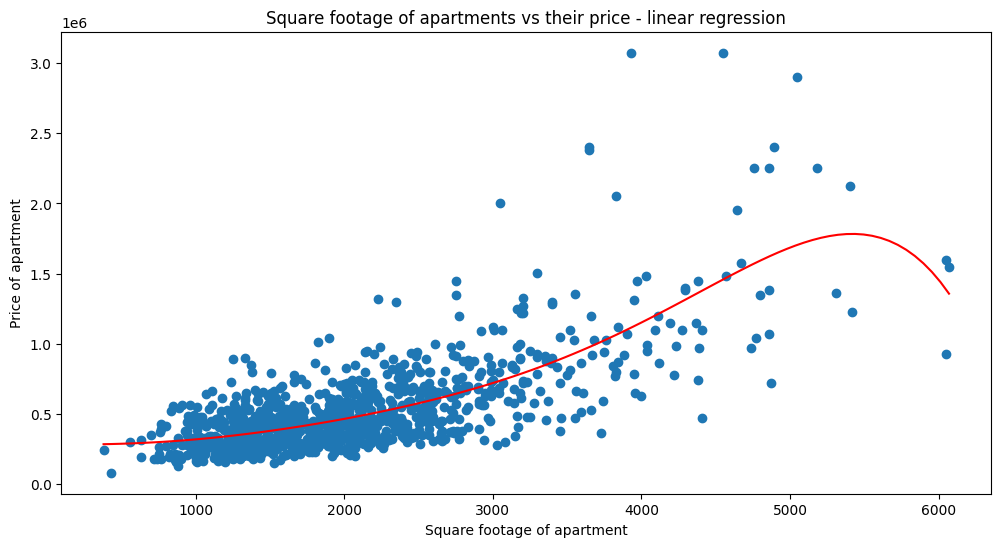

Order =  7


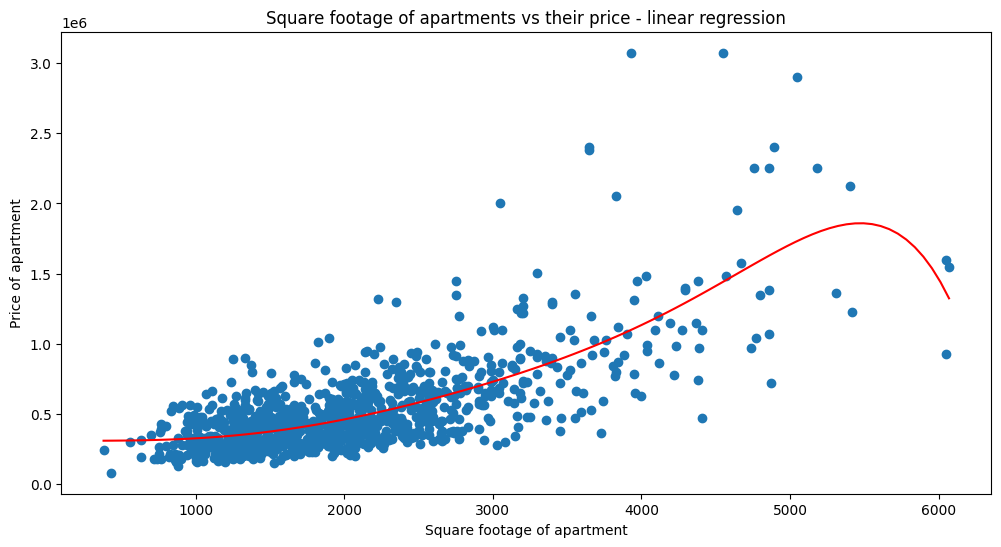

Order =  8


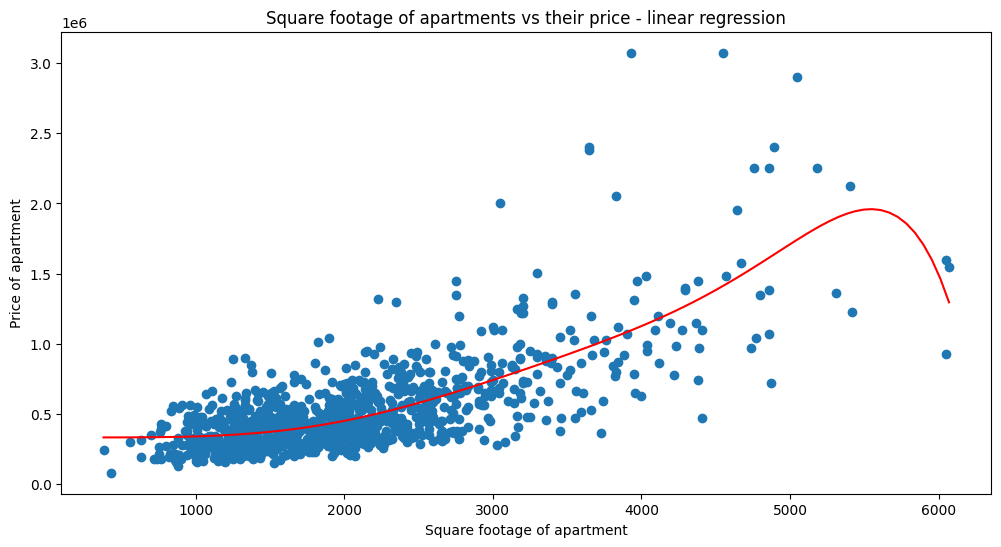

In [4]:
#c)

#lista do zapisania kolejnych otrzymanych wartości R2
mse_list = []

for order in range(1,9):
    print("Order = ", order)
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_order, y)

    #wyliczenie MSE i dodanie do listy
    mse_list.append(mean_squared_error(y, model.predict(X_order)))

    #zrobienie punktów potrzebnych, aby krzywa była gładka
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_order = poly.transform(X_range)

    y_exp = model.predict(X_range_order)

    plt.figure(figsize=(12, 6))
    plt.scatter(X, y)
    plt.plot(X_range, y_exp, color='red')
    plt.xlabel('Square footage of apartment')
    plt.ylabel('Price of apartment')
    plt.title('Square footage of apartments vs their price - linear regression')
    
    plt.show()

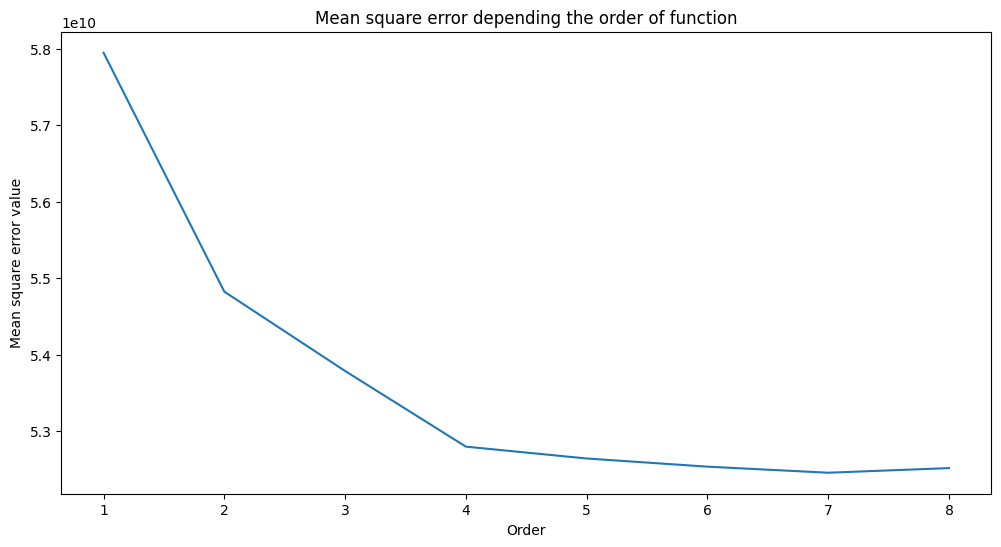

In [5]:
x = range(1, 9)

plt.figure(figsize=(12, 6))
plt.plot(x, mse_list)

# Dodanie tytułu i opisów osi
plt.title('Mean square error depending the order of function')
plt.xlabel('Order')
plt.ylabel('Mean square error value')

# Wyświetlenie wykresu
plt.show()

#Niższa wartość MSE oznacza lepsze dopasowanie krzywej do punktów pomiarowych.
#Można zauważyć, że dla rzędu funkcji wyższego niż 4 dalsze zmiany dokładności dopasowania są praktycznie niezauważalne.
#Dla badanych danych najsensowniejsze dopasowanie daje więc wielomian 4 rzędu

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

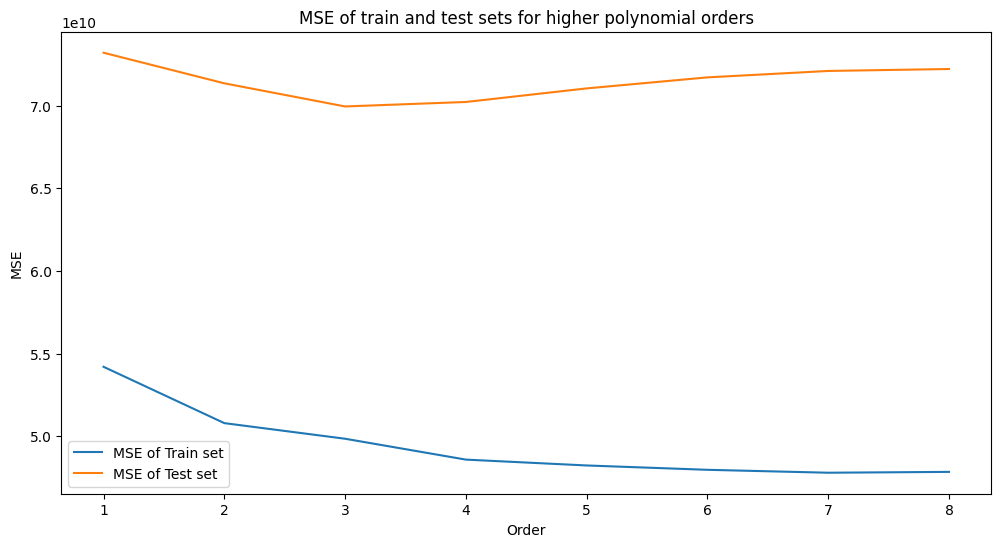

In [8]:
#a)
mse_train = []
mse_test = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.2, random_state=44)

    model = LinearRegression()
    model.fit(X_train, y_train)

    #wyliczenie MSE i dodanie do listy
    mse_train.append(mean_squared_error(y_train, model.predict(X_train)))
    mse_test.append(mean_squared_error(y_test, model.predict(X_test)))

x = range(1,9)

plt.figure(figsize=(12, 6))
plt.plot(x, mse_train, label='MSE of Train set')
plt.plot(x, mse_test, label='MSE of Test set')
plt.xlabel('Order')
plt.ylabel('MSE')
plt.title('MSE of train and test sets for higher polynomial orders')
plt.legend()

plt.show()

#Po podziale zbioru na testowy oraz treningowy można zauważyć, że biorąc pod uwagę jedynie MSE jako wyznacznik
#najmniejszą wartość dla zbioru testowego otrzymuje się dla wielomianu rzędu 3
#dla wyższych rzędów błąd zaczyna rosnąć, mimo że teoretycznie błąd zbioru treningowego maleje

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

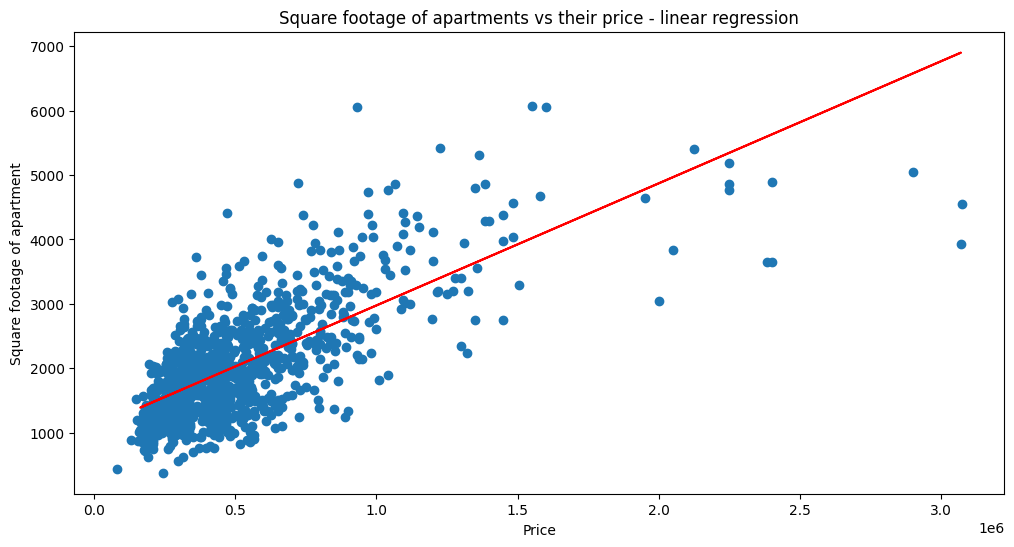

In [12]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

model = LinearRegression()
model.fit(X_train, y_train)

y_exp = model.predict(X_test)

#rysowanie wykresu
plt.figure(figsize=(12, 6))
plt.scatter(X, y)
plt.plot(X_test, y_exp, color='red')
plt.xlabel('Price')
plt.ylabel('Square footage of apartment')
plt.title('Square footage of apartments vs their price - linear regression')
    
plt.show()

In [13]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

#model wyjściowy

Mean squared error equals: 48749250331.21729


In [14]:
#model poprawiony

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'condition']].values.reshape(-1,5)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

#Proste poprawienie modelu było możliwe już przez samo zmienienie rozmiaru zbioru testowego i treningowego
#Inne wartości stopnia wielomianu przyczyniają się do pogorszenia modelu
#Uwzględnienie piątej zmiennej - condition - również pomogło poprawić model

Mean squared error equals: 42861524926.35233
